<a href="https://colab.research.google.com/github/oliviapang/DS_3001_Assignments/blob/main/Assignment_1/1_Wrangling_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/oliviapang/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 48 (delta 11), reused 5 (delta 5), pack-reused 28 (from 1)
Receiving objects: 100% (48/48), 408.80 KiB | 5.11 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Download complete
Extracting data files...
Data extracted


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question 1

In [ ]:
# 1
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding = 'latin1')
x = df['Price'].str.replace(',','')
x = pd.to_numeric(x, errors = 'coerce')
x.unique()

# Commas were removed from the price column using str.replace, then the type was changed to numeric such that any errors that
# couldn't be converted became NaN

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [ ]:
# 2
df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding = 'latin1')
df['subject_injury_na'] = df['subject_injury'].isna()
df['subject_injury_imp'] = df['subject_injury'].fillna('Missing')
print(df['subject_injury_imp'].value_counts('normalize'))
# The proportion of missing values is 0.761934
pd.crosstab(df['subject_injury_imp'], df['force_type'])

# The broad and less deadly force types (e.g. bodily force, chemical irritant, improvised weapon) have higher proportions of missing
# values than the force types that are generally more dangerous, including "Gun Point Display" and "Police K9 Bite".
# Additionally, the "Less Leathal" and "Maximal Restraint Technique" columns are missing all values, indicating there could be
# some inconsistency in when injury is recorded or not.

subject_injury_imp
Missing    0.761934
Yes        0.126190
No         0.111876
Name: proportion, dtype: float64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_imp,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [ ]:
# 3
df = pd.read_csv('/content/data/metabric.csv', encoding = 'latin1')
map = {'0:LIVING': 1, '1:DECEASED': 0}
df['Overall Survival Status_map'] = df['Overall Survival Status'].map(map)
df['Overall Survival Status_map']

,Overall Survival Status_map
0,1
1,0
2,1
3,0
4,0
...,...
1338,1
1339,0
1340,1
1341,0


In [ ]:
# 4
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding = 'latin1')
df['Review Scores Rating_na'] = df['Review Scores Rating'].isna()
print(df['Review Scores Rating_na'].value_counts())
# There are 8323 missing values in Review Scores Rating
imp_value = df['Review Scores Rating'].median()
df['Review Scores Rating_imp'] = df['Review Scores Rating'].fillna(imp_value)
df['Review Scores Rating_imp']
# Imputing missing values could negatively impact these results because it could be giving bad airbnbs artificially high scores.
# The median score calculated from the available data is 94, which is pretty high. It is unlikely that all 8323 properties with
# missing scores would actually score a 94.

Review Scores Rating_na
False    22155
True      8323
Name: count, dtype: int64


,Review Scores Rating_imp
0,94.0
1,94.0
2,94.0
3,94.0
4,96.0
...,...
30473,94.0
30474,94.0
30475,94.0
30476,94.0


Question 2

In [ ]:
# 1
df = pd.read_excel('/content/GSAF5.xls')
# This works

In [ ]:
# 2
remove = ['Unnamed: 21', 'Unnamed: 22']
df = df.drop(remove, axis = 1)

In [ ]:
# 3
'''
An observation is one shark attack. Each row in the dataframe gives information about a certain shark attack including the
location, victime, date, etc. Such details are unique to one attack, making an observation just a single attack. These attacks
are also reported by individuals from different organizations, making the formatting inconsistant. Thus, it would be useful to
clean the data such that all the entries are standardized.
'''

'\nAn observation is one shark attack. Each row in the dataframe gives information about a certain shark attack including the\nlocation, victime, date, etc. Such details are unique to one attack, making an observation just a single attack. These attacks\nare also reported by individuals from different organizations, making the formatting inconsistant. Thus, it would be useful to\nclean the data such that all the entries are standardized. \n'

In [ ]:
# 4
df['Year'].describe()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_clean = df.dropna(subset=['Year'])
print(df_clean['Year'].describe())
# The minimum year is 0, which actually just describes entries  where the year is uncertain/only know a range of years.
# The newest entries are from just a few days ago.
df_clean.loc[df_clean['Year'] > 1940,:]
# It appears that attacks are increasing over time, as there are 5513 entries after 1940, and the total number of entires is 7071.
# However, what seems to be an increase in attacks could also just be a product of the fact that it is easier to report attacks
# with the technology we have today than it was before 1940.

count    7071.000000
mean     1935.991515
std       270.689040
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",NaN,a local dignitary,M,NaN,...,Y,NaN,NaN,"Lt. Col. R. S. Hunt, pp.81-82",1941.00.00.e-local-dignitary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.e,1941.00.00.e,1559.0
5511,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",NaN,a Gurkha soldier,M,NaN,...,N,NaN,NaN,"Lt. Col. R. S. Hunt, p.80",1941.00.00.d-Gurkha-soldier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.d,1941.00.00.d,1558.0
5512,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",Slipped off rocks and fell into the water,boy,M,6,...,Y,NaN,NaN,"Lt.Col. R.S. Hunt, p.80",1941.00.00.c-small-boy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.c,1941.00.00.c,1557.0
5513,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",Standing,I.S.A.C. Ambulance driver,M,NaN,...,Y,NaN,NaN,"Lt.Col. R.S. Hunt, p.80",1941.00.00.b-IASCambulance-driver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.b,1941.00.00.b,1556.0


<Axes: xlabel='Age', ylabel='Count'>

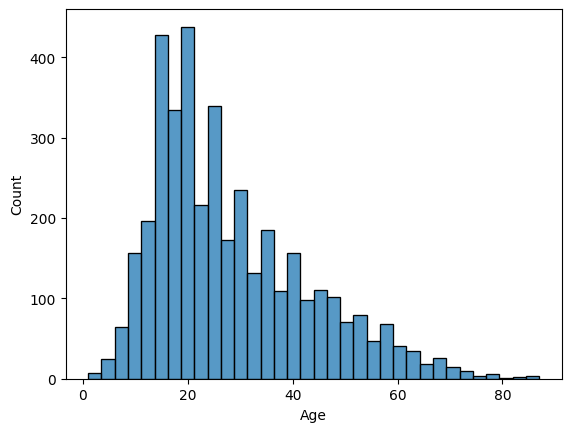

In [ ]:
# 5
df['Age_na'] = df['Age'].isna()
x = pd.to_numeric(df['Age'],errors='coerce')
sns.histplot(x)

In [ ]:
# 6
x = df['Type'].str.lower()
x = x.str.strip()


def clean(x):
  if x == 'unprovoked':
    return 'Unprovoked'
  elif x == 'provoked':
      return 'Provoked'
  else:
      return 'Unknown'

df['Type_clean'] = x.apply(clean)
df['Type_clean'].value_counts()
# The proportion of unprovoked attacks is 5225/7073 = 0.7387

,count
Type_clean,
Unprovoked,5225
Unknown,1204
Provoked,644


In [ ]:
# 7
x = df['Fatal Y/N'].str.lower()
x = x.str.strip()

def clean(x):
  if x == 'y':
    return 'Y'
  elif x == 'n':
    return 'N'
  else:
    return 'Unknown'

df['Fatal Y/N_clean'] = x.apply(clean)
df['Fatal Y/N_clean']

,Fatal Y/N_clean
0,Y
1,N
2,N
3,N
4,N
...,...
7068,Y
7069,Y
7070,Y
7071,Y


In [ ]:
# 8
pd.crosstab(df['Type_clean'], df['Fatal Y/N_clean'], normalize = True)
# It looks like the attack is more likely to be fatal if it is unprovoked, which is surprising to me.

Fatal Y/N_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.086809,0.001272,0.002969
Unknown,0.063481,0.078467,0.028277
Unprovoked,0.548282,0.011169,0.179273


Question 3

In [ ]:
'''
1. This paper discusses how to clean data. In particular, it discusses data tidying and its benefits.
2. The "tidy data standard" attempts to assist in initial data exploration and make the development of data analysis tools easier.
3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means that tidy
datasets share a common/standard format, making them very similar. Messy datasets can all be messy in different ways, whether
it be non-standard inputs or other formatting errors. These unique quirks make each messy dataset different from the others.
The sentence "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is
surprisingly difficult to precisely define variables and observations in general." means that in a dataset about a certain thing
it is obvious what is a variable and what is an observation. For example, in the shark dataset an observation was one attack event,
and variables included year, age, fatality, etc. However, in a broad more abstract sense and without a concrete example, it is
ahrd to define variables and observations.
4. Values: numbers or strings that make up a dataset; Variables: a grouping of all values that measure the same attribute across
units; Observations: something that contains all values measured on the same unit
5. Tidy data is defined as a standard way of matching a dataset's meaning to its structure. In tidy data, variables form columns,
observations form rows, and each type of observational unit forms a table.
6. Five most common problems: column headers are values instead of variable names, multiple variables stored in one column, variables
stored in rows and columns, multiple types of observational units stored in same table, and a single observational unit is stored in
multiple tables.
Table 4 is messy because the column headers are values of the "income" variable.
Melting a dataset is when columns are turned into rows.
7. Table 11 is messy because the day is a column header, but it is really part of a "date" variable. In Table 12, day, month, and year
have been combined into one "date" variable and made into a column, making the table molten.
'''

Question 4

In [3]:
# 1
df = pd.read_csv('/content/data/ForeignGifts_edu.csv')

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


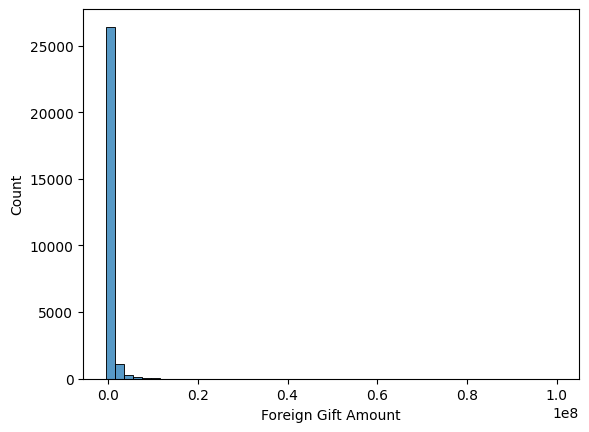

In [22]:
# 2
sns.histplot(df['Foreign Gift Amount'], bins = 50)
df['Foreign Gift Amount'].describe()
# The distribution of Foreign Gift Amount is very right skewed. Most gift amounts are around a few tens of thousands of dollars.
# The maximum of 100 million dollars is an outlier and makes the mean artificially high. The negative value is also a bit odd
# and could represent a refund or a record keeping error.

In [24]:
# 3
df['Gift Type'].value_counts(normalize=True)
# The proportions for contracts, real estate, and monetary gifts are shown in the table below.

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [40]:
# 4
# top 15 countries in terms of number of gifts
print(df.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15))
# top 15 countries in terms of amout given
df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


Text(0, 0.5, 'Number of Institutions')

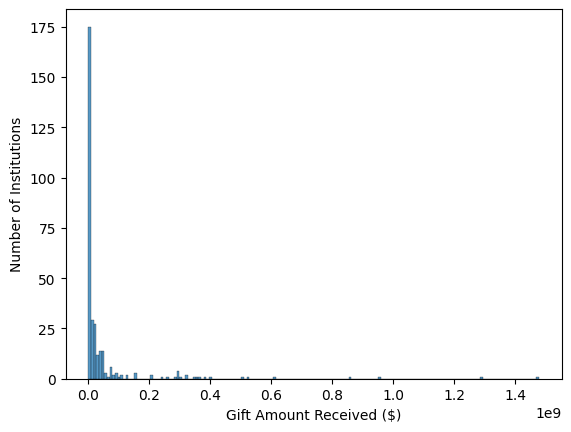

In [48]:
# 5
print(df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15))
x = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
sns.histplot(x)
plt.xlabel('Gift Amount Received ($)')
plt.ylabel('Number of Institutions')

In [ ]:
# 6
# Qatar, England, and China are the three countries which have provided the most money in total.

Question 5

In [49]:
# 1
df = pd.read_csv('/content/data/college_completion.csv')

In [53]:
# 2
print(df.shape)
# 3798 observations, 63 variables
df.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [54]:
# 3
pd.crosstab(df['control'], df['level'])
# Private not-for-profit universities are predominantly 4-year institutions. Private for-profit universities are almost evenly
# split between 2 and 4 year institutions. Public universities are mostly 2-year institutions.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


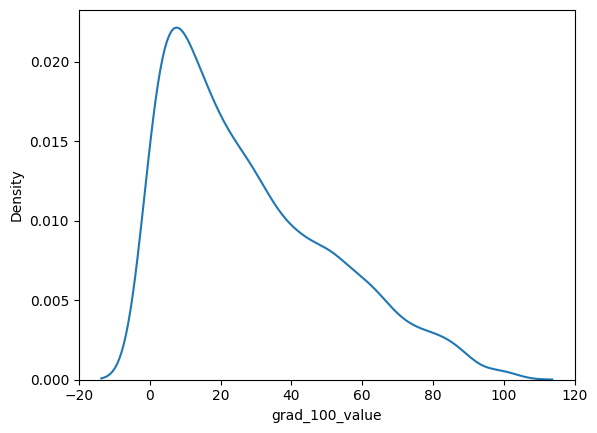

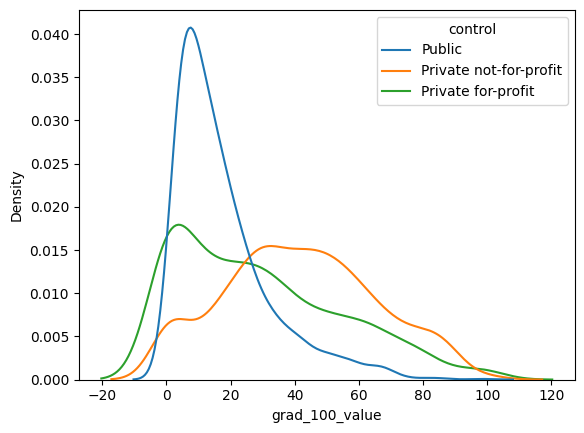

In [67]:
# 4
sns.kdeplot(df['grad_100_value'])
print(df['grad_100_value'].describe())
plt.figure()
sns.kdeplot(x = df['grad_100_value'], hue = df['control'], common_norm = False)
print(df['grad_100_value'].groupby(df['control']).describe())
# Private not-for-profit institutions seem to have the best graduation rates

Covariance 
                    aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382
Correlation 
                 aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000
Covariance 
                                           aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489
Correlation 
                                        aid_value  grad_100_value
control                                                         
Private for

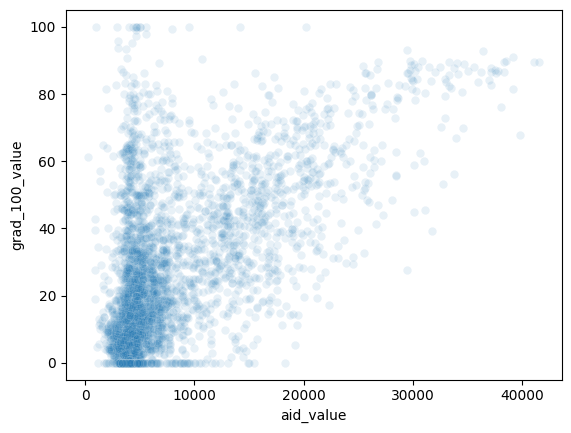

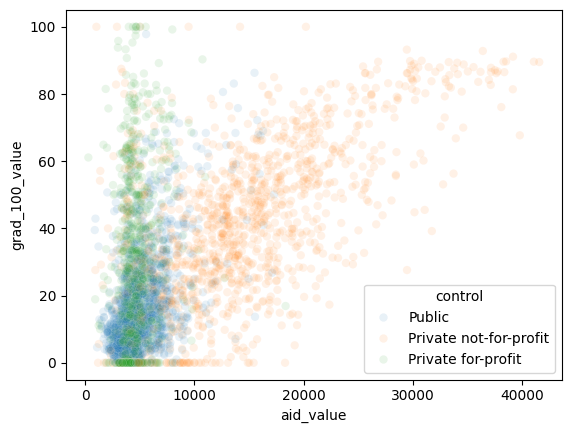

In [91]:
# 5
sns.scatterplot(x=df['aid_value'], y = df['grad_100_value'], alpha=.1)
var_list = ['aid_value', 'grad_100_value']
print('Covariance \n', df.loc[:,var_list].cov(numeric_only=True))
print('Correlation \n', df.loc[:,var_list].corr(numeric_only=True))
plt.figure()
sns.scatterplot(x=df['aid_value'], y = df['grad_100_value'], hue = df['control'], alpha=.1)
print('Covariance \n', df.loc[:,var_list].groupby(df['control']).cov(numeric_only=True))
print('Correlation \n', df.loc[:,var_list].groupby(df['control']).corr(numeric_only=True))
# Private not-for-profit institutions provide a wider range of aid, including amounts which are much higher than those from private
# for-profit and public institutions. Private not-for-profit institutions also have higher graduation rates. Correlation is
# strongest between aid value and grad_100_value for private not-for-profit institutions, further illustrating the above point.

Question 6 --> image in repo

Question 7

In [92]:
# 1
df = pd.read_csv('/content/data/ames_prices.csv')

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


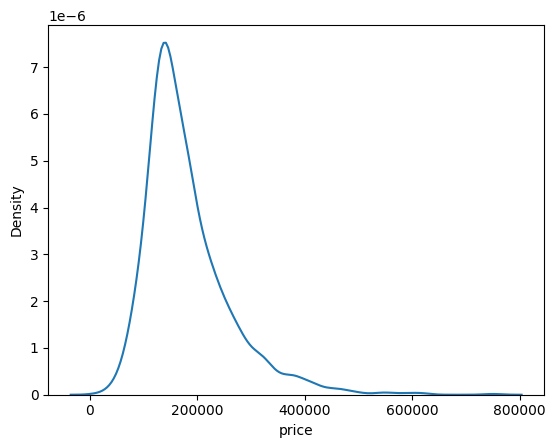

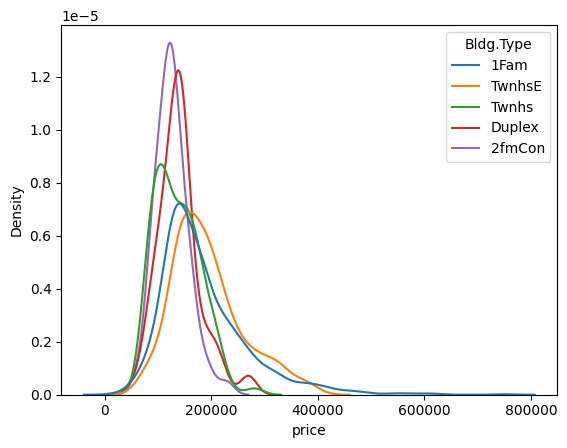

In [97]:
# 2
sns.kdeplot(df['price'])
print(df['price'].describe())
plt.figure()
sns.kdeplot(x = df['price'], hue = df['Bldg.Type'], common_norm = False)
print(df['price'].groupby(df['Bldg.Type']).describe())
# End-unit townhomes and single family homes are the most expensive, on average. Single family homes have the highest variance in
# transaction prices.

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


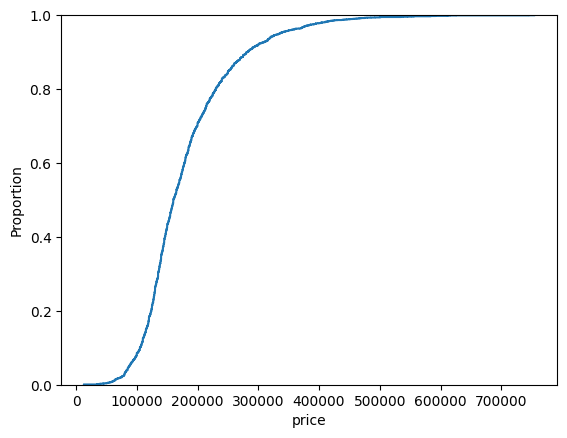

In [102]:
# 3
sns.ecdfplot(df['price'])
df['price'].describe()

<Axes: xlabel='price'>

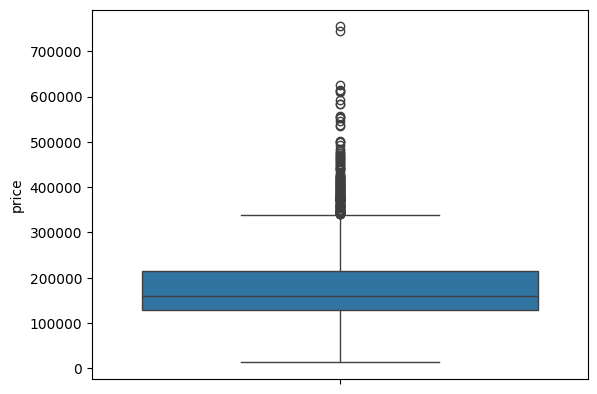

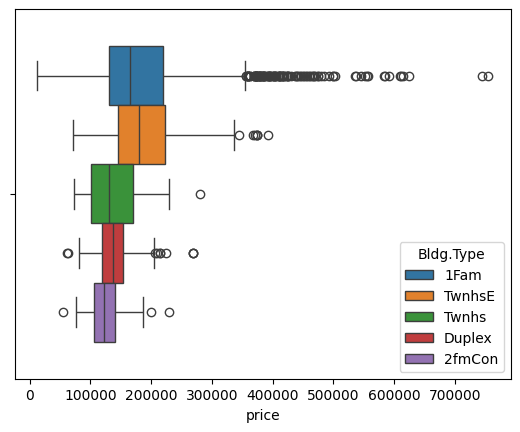

In [108]:
# 4
sns.boxplot(df['price'])
# Yes, there are outliers
plt.figure()
sns.boxplot(x = df['price'], hue = (df['Bldg.Type']))
# Single family homes has the most outliers, all lying outside the upper whisker. This helps visualize the larger standard
# deviation found in price for single family homes. For all building types, almost all of the outliers fall above the upper
# whisker.

In [117]:
# 5
q75 = np.nanquantile(df['price'], .75)
q25 = np.nanquantile(df['price'], .25)
iqr = q75 - q25
upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr
df['price_is_outlier'] = ( (df['price'] < lower_whisker) |
(df['price'] > upper_whisker) ).astype(int)

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsorize, dtype: float64


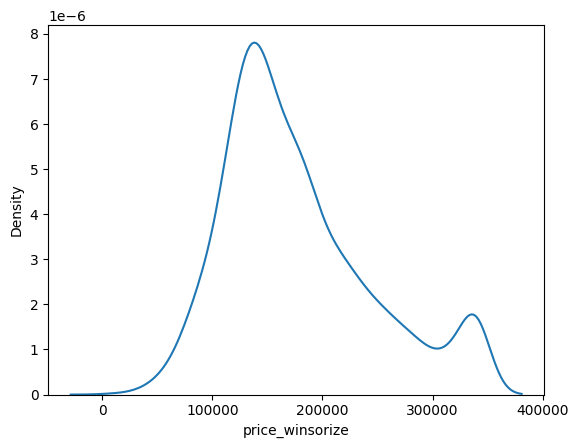

In [119]:
# 6
df['price_winsorize'] = ( (df['price'] < lower_whisker) * lower_whisker
+ (df['price'] > upper_whisker) * upper_whisker
+ (df['price'] >= lower_whisker) * (df['price'] <= upper_whisker) * df['price'])
sns.kdeplot(df['price_winsorize'])
print(df['price_winsorize'].describe())
# The distribution is now less right skewed. There is a increase in density around 350,000 which likely comes from winsorizing
# the data. The mean has decreased, although not dramatically; the standard deviation decreased as well since the outliers
# were moved in and the spread has been reduced.